[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Humboldt-WI/adams/blob/master/exercises/tut10_Attention_teacher.ipynb)

# Attention and transformers

In this exercise you will apply a transformer model to the task of sentiment classification. We highlight two very important properties of transformer models.
* self-attention: this mechanism enables the models to capture the context of each word within an incoming text.
* positional encoding: Just like RNN's, transformers process sequence data, but instead of using hidden states to capture the ordering of words, transformers use positional embeddings.

The first part of the exercise is meant to give an intuition of the self-attention principle. In addition to solving the exercise, you can watch the video https://www.youtube.com/watch?v=g2BRIuln4uc, which illustrates the idea of attention very clearly. Positional encodings are a rather abstract topic and will not be handled in this exercise. However, the video https://www.youtube.com/watch?v=1biZfFLPRSY offers a simple and understandable illustration of this topic.

In the second part of the tutorial, you will implement a simplified version of the forward pass in Transformer Neural Networks. In the third part of the tutorial, you need to apply a BERT (Bidirectional Encoder Representations from Transformers) model, which belongs to the family of transformer models.  



In [58]:
## required libraries
import numpy as np
import pandas as pd
from scipy.special import softmax
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
## definition of the vocabulary
voc = ['I', 'swam', 'across', 'the', 'river', 'to', 'get', 'other', 'bank', 'drove', 'road']

In [60]:
## artificial two dimensional embeddings
emb = pd.DataFrame([[1, 1],
                    [2, 2],
                    [1.2, 1.2],
                    [0.9,0.9],
                    [1.9,1.9],
                    [0.8,0.8],
                    [0.85,0.85],
                    [0.95,0.95],
                    [0,2],[2,-2],
                    [2,-1.9]])

### Exercise 1
In this exercise we want to generate contextualized embeddings. Let $[v_{1},...,v_{n}]$ be a sentence were $v_{i}$ is the (non-contextualized) embedding of token $i$. A contextualized embedding $y_{i}$ of word $i$ is the weighted sum of the (non-contextualized) embeddings of the tokens in that sentence $y_{i}=\sum_{j=1}^{n} w_{ij}v_{j}$. The $w_{ij}$ are the attention weights, which measure the importance of token $j$ for the context, in which token $i$ appears.

a) Your first exercise is to calculate the attention weights for each token in the sentence "I swam across the river, to get to the other bank." The weights should be stored in a matrix \begin{bmatrix}
w_{11} & ... & w_{1n}\\
\vdots & \vdots & \vdots \\
w_{n1} & ... & w_{nn}
\end{bmatrix} Below, we provide a function to calculate the weights.

In [61]:
## function to calculate the attention weights
def attention_weights(token, sent, emb,voc):
    idx_token=voc.index(token)
    #print(token)
    #print(idx_token)

    idx_sentence = []
    for i in range(0, len(sent)):
        idx_sentence.append(voc.index(sent[i]))#[idx for idx, element in enumerate(voc) if element == sent[i]][0])

    #print(idx_sentence,'\n')

    weights = softmax([np.dot(emb.iloc[idx_token],emb.iloc[i]) for i in idx_sentence])

    ## return
    return weights

Take each token $i$, find it's index in the vocabulary of unique words, based on that index, get the embeddings of that token from the dataframe $emb$. After retrieving the embeddings for each token, before moving onto to the next token, retrieve the embeddings for all other tokens in the tokenized list, and compute dot products between the embddings of token $i$ and all other embeddings. In this way, we quantify the relationship between the embeddings of each token with the embeddings of all other tokens. The dot products for each token $i$ with all other embeddings are then squashed with the softmax activation function.

In [62]:
## calculation of the weights
sent_water = ['I', 'swam', 'across', 'the', 'river', 'to', 'get', 'to', 'the', 'other', 'bank']
sent_weights = []
for i_token in range(0, len(sent_water)):
  sent_weights.append(attention_weights(sent_water[i_token], sent_water,emb,voc))

## print results
print(pd.DataFrame(sent_weights))

          0         1         2         3         4         5         6   \
0   0.046394  0.342811  0.069212  0.037985  0.280670  0.031099  0.034370   
1   0.010098  0.551336  0.022474  0.006769  0.369572  0.004537  0.005542   
2   0.036094  0.397865  0.058330  0.028392  0.312972  0.022334  0.025182   
3   0.051869  0.313790  0.074346  0.043325  0.262100  0.036188  0.039596   
4   0.012033  0.537892  0.025730  0.008229  0.367843  0.005627  0.006805   
5   0.057415  0.284376  0.079067  0.048925  0.242329  0.041692  0.045164   
6   0.054641  0.299100  0.076767  0.046098  0.252340  0.038892  0.042342   
7   0.057415  0.284376  0.079067  0.048925  0.242329  0.041692  0.045164   
8   0.051869  0.313790  0.074346  0.043325  0.262100  0.036188  0.039596   
9   0.049116  0.328381  0.071821  0.040617  0.271558  0.033588  0.036936   
10  0.035787  0.264430  0.053387  0.029300  0.216497  0.023989  0.026511   

          7         8         9         10  
0   0.031099  0.037985  0.041979  0.046394

b) Plot a heat map of the weights, using sns.heatmap.

<Axes: >

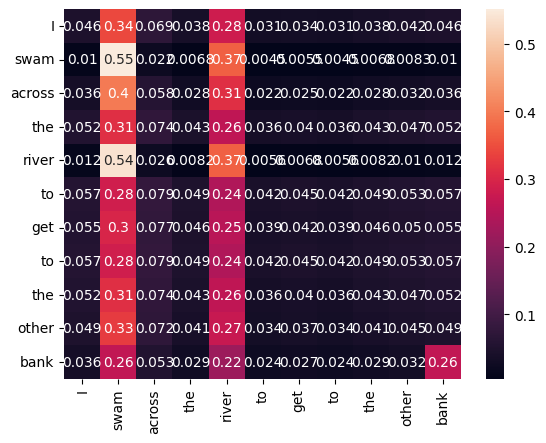

In [63]:
sns.heatmap(pd.DataFrame(sent_weights, columns=sent_water, index = sent_water), annot=True)

c) Calculate the contextualized embedding of the word "bank" in the two sentences "I swam across the river, to get to the other bank." and "I drove across the road, to get to the other bank". You can do this by multiplying the transposed embedding matrix $E'=\begin{bmatrix}
v_{1} & ... & v_{n}\\
\end{bmatrix}$ with the vector $\begin{bmatrix}
w_{i1} & ... & w_{in}\\
\end{bmatrix}$, of the weights of "bank".  

In [64]:
sent_water = ['I', 'swam', 'across', 'the', 'river', 'to', 'get', 'to', 'the', 'other', 'bank']
sent_road = ['I', 'drove', 'across', 'the', 'road', 'to', 'get', 'to', 'the', 'other', 'bank']
weights_bank_water = attention_weights('bank', sent_water,emb,voc)
weights_bank_road = attention_weights('bank', sent_road,emb,voc)
print(weights_bank_water)

[0.0357867  0.26442994 0.05338748 0.02929967 0.21649692 0.02398854
 0.02651144 0.02398854 0.02929967 0.03238115 0.26442994]


We take the attention scores, indicating how important other tokens are for the context of the word 'bank' in each sentence, and compute the dot product between these attention weights and the non-contextualized embeddings of all tokens in the sentences.  

In [65]:
emb_bank_water=np.array([emb.iloc[voc.index(token),:].values for token in sent_water])
emb_bank_water_contextualized = np.dot(emb_bank_water.T,weights_bank_water)

emb_bank_road=np.array([emb.iloc[voc.index(token),:].values for token in sent_road])
emb_bank_road_contextualized = np.dot(emb_bank_road.T,weights_bank_road)
print(emb_bank_water_contextualized)
print(emb_bank_road_contextualized)

[1.1844736  1.71333348]
[0.47116835 1.48813891]


d) Now, you generated contextualized embeddings in a very simple way by calculating scalar products between the un-contextualized embeddings $s_{ij}=\langle\,v_{i},v_{j}\rangle$, calculating weights by softmax $w_{ij}=\frac{e^{s_{ij}}}{\sum_{j}e^{s_{ij}}}$ and building a weighted sum of the un-contextualized embeddings $y_{i}=\sum_{j}w_{ij}v_{j}$. Does it make sense to integrate this transformation procedure for the embeddings into a machine learning model or is there a way we could modify this procedure, such that it makes more sense?  

### Answer
The above procedure is deterministic, so there is nothing to learn for a machine learning model. We could add three weight matrices $M_{q}$ (queries), $M_{k}$ (keys), $M_{v}$ (values) to the process. The scalar products then become $s_{ij}=\langle\,M_{q}v_{i},M_{k}v_{j}\rangle$ and the weighted sum of embeddings becomes $y_{i}=\sum_{j}w_{ij}M_{v}v_{j}$. The weights of these matrices can be learned within a machine learning model.

## Exercise 2 Transformer Neural Networks (forward pass)
In this excercise, we will compute a simplified version of the forward pass in a transformer neural network: we will focus mainly on the computations concerning the weight matrices used in the (self-)attention mechanism in the encoder and the decoder. This means, we will ignore for now the addition of positional embeddings, the residual connections, the normalization layers, also the fully-connected neural networks in the encoder and the decoder, and the head of the entire model. Furthermore, for simplicity purposes, we will ignore biases as well.

In [66]:
import tensorflow as tf
german_sentence=['Mir','gefiel','die','Vorlesung']
english_sentence=['[START]','I','liked','the','lecture']

embedded_input=tf.keras.initializers.RandomNormal()(shape=(len(german_sentence),300))
embedded_output=tf.keras.initializers.RandomNormal()(shape=(len(english_sentence),300))

#Encoder:
d_model=embedded_input.shape[1]
Mq_en=tf.keras.initializers.RandomNormal()(shape=(d_model,d_model))#Encoder query matrix weights
Mk_en=tf.keras.initializers.RandomNormal()(shape=(d_model,d_model))#Encoder key matrix weights
Mv_en=tf.keras.initializers.RandomNormal()(shape=(d_model,d_model))#Encoder value matrix weights

Q_en=tf.matmul(embedded_input,Mq_en)
K_en=tf.matmul(embedded_input,Mk_en)
V_en=tf.matmul(embedded_input,Mv_en)
Q_K_en=tf.matmul(Q_en,tf.transpose(K_en))
scaled_Q_K_en=tf.math.divide(Q_K_en,tf.math.sqrt(tf.cast(d_model,dtype=tf.float32)))
print('Encoder attention scores before squashing with softmax: ',scaled_Q_K_en,'\n')
attention_scores_en=tf.keras.activations.softmax(scaled_Q_K_en)
print('Encoder attention scores after squashing with softmax: ',attention_scores_en,'\n')
weighted_V_en=tf.matmul(attention_scores_en,V_en)#output from one encoder self-attention head
print('Weighted sum of values (mapped tokens in the input sequence) per each input token: ',weighted_V_en,'\n')


#Decoder:
#1.Submodule:
Mq_fm_de=tf.keras.initializers.RandomNormal()(shape=(d_model,d_model))#Decoder (1.submodule) query matrix weights
Mk_fm_de=tf.keras.initializers.RandomNormal()(shape=(d_model,d_model))#Decoder (1.submodule) key matrix weights
Mv_fm_de=tf.keras.initializers.RandomNormal()(shape=(d_model,d_model))#Decoder (1.submodule) value matrix weights

Q_fm_de=tf.matmul(embedded_output,Mq_fm_de)
K_fm_de=tf.matmul(embedded_output,Mk_fm_de)
V_fm_de=tf.matmul(embedded_output,Mv_fm_de)
Q_K_fm_de=tf.matmul(Q_fm_de,tf.transpose(K_fm_de))
scaled_Q_K_fm_de=tf.math.divide(Q_K_fm_de,tf.math.sqrt(tf.cast(d_model,dtype=tf.float32)))
masked_Q_K_fm_de=tf.where(tf.linalg.band_part(scaled_Q_K_fm_de,
                                              num_lower=-1,
                                              num_upper=0)==0.0,tf.constant(-np.inf),scaled_Q_K_fm_de)

print('Decoder (1. submodule) masked attention scores before squashing with softmax: ',masked_Q_K_fm_de,'\n')
attention_scores_fm_de=tf.keras.activations.softmax(masked_Q_K_fm_de)
print('Decoder (1. submodule) attention scores after squashing with softmax: ',attention_scores_fm_de,'\n')
weighted_V_fm_de=tf.matmul(attention_scores_fm_de,V_fm_de)#output from one decoder (1. submodule) self-attention head
#the output from the frist module of the decoder becomes the query for the next module in the decoder
print('Weighted sum of values (mapped tokens in the output sequence) per each output token: ',weighted_V_fm_de,'\n')

#2.Submodule:
Mq_sm_de=tf.keras.initializers.RandomNormal()(shape=(d_model,d_model))#Decoder (2.submodule) query matrix weights
Mk_sm_de=tf.keras.initializers.RandomNormal()(shape=(d_model,d_model))#Decoder (2.submodule) key matrix weights
Mv_sm_de=tf.keras.initializers.RandomNormal()(shape=(d_model,d_model))#Decoder (2.submodule) value matrix weights

Q_sm_de=tf.matmul(weighted_V_fm_de,Mq_sm_de)#the query matrix in the 2. submodule of the decoder: computed using the
#output from the 1. submodule
K_sm_de=tf.matmul(weighted_V_en,Mk_sm_de)
V_sm_de=tf.matmul(weighted_V_en,Mv_sm_de)
#the key and value matrix in the 2. submodule of the decoder: computed using the encoder output
Q_K_sm_de=tf.matmul(Q_sm_de,tf.transpose(K_sm_de))
scaled_Q_K_sm_de=tf.math.divide(Q_K_sm_de,tf.math.sqrt(tf.cast(d_model,dtype=tf.float32)))
print('Decoder (2. submodule) attention scores before squashing with softmax: ',scaled_Q_K_sm_de,'\n')
attention_scores_sm_de=tf.keras.activations.softmax(scaled_Q_K_sm_de)
print('Decoder (2. submodule) attention scores after squashing with softmax: ',attention_scores_sm_de,'\n')
weighted_V_sm_de=tf.matmul(attention_scores_sm_de,V_sm_de)#output from one decoder (2. submodule) self-attention head
print('Weighted sum of values (mapped tokens in the input sequence) per each output token: ',weighted_V_sm_de)

Encoder attention scores before squashing with softmax:  tf.Tensor(
[[-3.2592225e-03  2.2276216e-03  7.6148065e-04  1.5475344e-03]
 [-2.7339463e-03 -1.6868222e-04 -8.7545894e-04 -1.4702403e-03]
 [ 6.5314765e-05  2.5166646e-03 -1.4796794e-03  1.7246170e-03]
 [ 2.3766099e-04 -2.6303488e-03 -2.4122138e-04  1.1514601e-03]], shape=(4, 4), dtype=float32) 

Encoder attention scores after squashing with softmax:  tf.Tensor(
[[0.24910639 0.25047696 0.25011    0.25030667]
 [0.2496447  0.25028592 0.25010908 0.24996036]
 [0.24983941 0.2504526  0.24945371 0.2502543 ]
 [0.25015184 0.24943545 0.2500321  0.25038055]], shape=(4, 4), dtype=float32) 

Weighted sum of values (mapped tokens in the input sequence) per each input token:  tf.Tensor(
[[ 0.00647684  0.02372971 -0.00072365 ...  0.03359265  0.02442574
  -0.00467355]
 [ 0.00647566  0.02377805 -0.0007779  ...  0.03362376  0.0244077
  -0.00467645]
 [ 0.00650764  0.02381968 -0.0007863  ...  0.03361397  0.02443591
  -0.00466324]
 [ 0.00646405  0.02380

## Exercise 3 (demonstration of BERT model use)
In this exericise you will use a pre-trained BERT model. You will load the model and than do some fine tuning on the model weights. We recommend to do the exercise in Google Colab because we faced some errors when loading the transformer packages on our own environment. The exercise follows the original tuturial [TF-Tutorial](https://www.tensorflow.org/text/tutorials/classify_text_with_bert).

The archtecture of BERT models is realy complicated and will not be treated in detail here. We recommend the following tutorial, which gives an excellent illustrationof transformer models [Tut. transformer](http://jalammar.github.io/illustrated-transformer/).   

### Install transformers
Unlike many other libraries, Colab does not have the transformers package pre-installed. You will have to install it every time that you start Colab again. This is the package where you will find most of the critical tools for BERT including the pre-trained models and tokenizer.

In [ ]:
!pip install -q -U "tensorflow-text==2.8.*"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 498.1/498.1 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 65.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.3/462.3 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 75.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 13.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-datasets 4.9.2 requires protobuf>=3.20, but you have protobuf 3.19.6 which is incompatible.
tens

In [ ]:
!pip install -q tf-models-official==2.7.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 41.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 47.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 99.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 107.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.3/53.3 kB 4.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following depen

### Import libraries
Now that you have the transfomers library on hand, it will be necessary to import it and the rest of the libraries that you will need in the task. Here we will need tensorflow, pandas, OS and shutil for basic tasks and also specific parts of the transformers package for BERT.

In [2]:
import os
import shutil

import tensorflow as tf
import tensorflow_hub as hub # for BERT models
import tensorflow_text as text
from official.nlp import optimization  # for AdamW optimizer

import matplotlib.pyplot as plt

tf.get_logger().setLevel('ERROR')

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.10.0 and strictly below 2.13.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.8.4 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're us

### Load and set up the dataset

In this task, we will be using the IMDB reviews dataset. Unlike in the previous exercises, we download the data and store it in a directory.

In [4]:
url = 'https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz'

#Dowloading data using tf.keras.utils.get_file:
df = tf.keras.utils.get_file('aclImdb_v1.tar.gz', url,
                                  untar=True, cache_dir='./New_Data',#which subfolder of content folder to choose
                                  cache_subdir='Other')#which subfolder of cache_dir folder to create to save the file in:
                                  #should not be created in advance.
#/content is the root folder of Google Colab and all files that you download will either be saved in content, or in a subfolder of content.


84140032/84125825 [==============================] - 4s 0us/step


In [ ]:
df_dir = os.path.join(os.path.dirname(df), 'aclImdb')
X_train_dir = os.path.join(df_dir, 'train')
X_test_dir = os.path.join(df_dir, 'test')

# we only need labeled data (data for supervised learning), so we can remove the unsupervised folder
remove_dir = os.path.join(X_train_dir, 'unsup')
shutil.rmtree(remove_dir)
#shutil offers high-level operations on files.

BERT is going to take up a lot of processing power. It is highly advisable to organize your data into batches so that the amount of data that you are working with is manageable. For now, we will set the size of the batches of data that we will take to 32. You can experiment with this number when working with the program for later tasks.

In [7]:
batch_size = 32


Note that the function [prefetch](https://www.tensorflow.org/guide/data_performance#prefetching) is just used to prepare the data as the machine would expect to receive it. It is normally used to make sure that the next batch of data is ready for use.

In [8]:
# set seed for reproducibility in train-test split
seed = 888

# Create the pre-processing train df and create a seperate subset training only
X_train_raw = tf.keras.preprocessing.text_dataset_from_directory(
    X_train_dir,
    batch_size=batch_size,
    validation_split=0.2,
    subset='training',
    seed=seed)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.


In [33]:
#Caching files: https://www.tensorflow.org/guide/data_performance
#Without using the caching function, at the beginning of every epoch, tensorflow will open a file containing your data,
#will then read the data from that file, and only then use it for the forward and backward pass,
#while opening the file & reading the data: your model is in 'waiting' mode, this computational time can be optimized with caching!
#put in simple and intuitive terms:
#imagine you need some book from the library when studying for one specific exam. This book you want to open and read information from
# frequently while preparing for the exam. Thus, it makes sense instead of keeping this book in the library, to store it on your desk at home.
#Then, your desk becomes your cache!
#On the software side, caches are everywhere: operating systems, browsers, DNS, databases etc, and are always used for the same purpose:
#store data in fast memory so that it can be retrieved quicker later on.

X_train = X_train_raw.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
#Prefetching:
#In addition to CPU and RAM, Colab also offers access to GPUs and TPUs for machine learning tasks. GPU is used to perform the forward
#and the backward pass. While the GPU is working, we want the CPU to be processing the next batch/batches of data so that by
#the time the GPU is ready with the backward pass, we can start the forward and backward pass of the next batch of data immediately.
#In this way, we make sure to be using the GPU fully all the time during the training. This behaviour is called consumer-producer behaviour,
#where the CPU is producer of the data, and the GPU is the consumer of the output from the CPU. With prefetch(1) we would always prepare
#the next batch of data. Sometimes, we would like to have several batches of data ready in advance. Thus, best to pass tf.data.AUTOTUNE
#to the parameter buffer_size of prefetch() in order to let tensorflow tune the value which optimizes the performance.


# Take the validation data subset for processing
X_val = tf.keras.preprocessing.text_dataset_from_directory(
    X_train_dir,
    batch_size=batch_size,
    validation_split=0.2,
    subset='validation',
    seed=seed)

X_val = X_val.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

# Prepare the test data for processing
X_test = tf.keras.preprocessing.text_dataset_from_directory(
    X_test_dir,
    batch_size=batch_size,
    seed=seed)

X_test = X_test.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

Found 25000 files belonging to 2 classes.
Using 5000 files for validation.
Found 25000 files belonging to 2 classes.


### Load a BERT model

You can explore a [large list of versions of BERT here](https://huggingface.co/models). These pretrained versions of BERT differ mainly in size and/or the topics of text. Using specific versions of BERT can sometimes help with the performance of your model, though this is not always the case. It is a very good idea to test several versions of BERT for your purposes to see which one is optimal for your situation. For our purposes, we will use a small uncased BERT. Here, uncased means that BERT will ignore capitalization and small means that BERT will only take shorter inputs.

As the BERT model needs input of a specific format, we also need to load a customized pre-processor, which converts the text in exactly the right format.

In [34]:
## load the preprocessor
bert_preprocessor = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3')

## load the BERT model
bert_model = hub.KerasLayer('https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',trainable=True)

Now, we have a look how the preprocessor works. For this purpose we define an example sentence and then examine the preprocessed sentence.


In [35]:
example_text = ['hated every minute of it.']
example_text_2 = ['really enjoyed the show']

example_preprocessed = bert_preprocessor(example_text)
example_preprocessed_2 = bert_preprocessor(example_text_2)


print(f'Shape of input_word_ids: {example_preprocessed["input_word_ids"].shape}')
print(f'First 12 input_word_ids: {example_preprocessed["input_word_ids"][0, :12]}')
print(f'First 12 input_word_ids: {example_preprocessed_2["input_word_ids"][0, :12]}')


Shape of input_word_ids: (1, 128)
First 12 input_word_ids: [ 101 6283 2296 3371 1997 2009 1012  102    0    0    0    0]
First 12 input_word_ids: [ 101 2428 5632 1996 2265  102    0    0    0    0    0    0]


In [36]:
bert_preprocessor(example_text)

{'input_word_ids': <tf.Tensor: shape=(1, 128), dtype=int32, numpy=
 array([[ 101, 6283, 2296, 3371, 1997, 2009, 1012,  102,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0]], dtype=int32)>,
 'input_type_ids': <tf.Tensor: shape=(1,

In [37]:
#Outputs from the BERT preprocessor: https://www.tensorflow.org/text/tutorials/classify_text_with_bert,https://www.tensorflow.org/hub/common_saved_model_apis/text#transformer-encoders
#input_word_ids: the ids from the vocabulary used to train the BERT models, including the start token and the end token.

#input_mask: indicating at which position we have actual tokens, and where the padding of the sequence starts. Relevant for computing a masked
#attention matrix, as it makes no sense to have the tokens in our sentences attending to padded (non-existent) tokens
#(https://github.com/google-research/bert/blob/cc7051dc592802f501e8a6f71f8fb3cf9de95dc9/modeling.py#L524).

#input_type_ids: related to the NLP task of sentence classification, which is one of the tasks BERT was pre-trained on. In sentence classification,
#BERT predicts whether sentence B follows sentence A. Thus, we have tokens, which belong to two sentences, but the model does not know that,
#without any additional information. Thus, we want to make use of the so-called segment embeddings, indicating which token is assigned to which
#sentence. For this reason in the trainable variables of BERT we can see that we also have type embeddings.

In [38]:
bert_model.trainable_variables[0:3]

[<tf.Variable 'word_embeddings/embeddings:0' shape=(30522, 512) dtype=float32, numpy=
 array([[ 0.07700924, -0.10239143,  0.01086847, ...,  0.02648759,
          0.05274116, -0.009886  ],
        [-0.0061628 , -0.0447717 ,  0.00677108, ...,  0.04599561,
          0.0176833 , -0.04868097],
        [-0.00140176, -0.018351  ,  0.02070379, ...,  0.09362025,
          0.05605398, -0.06899607],
        ...,
        [-0.05386432, -0.02979652,  0.07105876, ...,  0.00571508,
          0.01720937, -0.04373623],
        [ 0.04459467, -0.05707855,  0.00280032, ..., -0.01379223,
          0.05343876, -0.07411715],
        [ 0.07978501,  0.03066262, -0.0253515 , ...,  0.03888825,
          0.04173004, -0.0208263 ]], dtype=float32)>,
 <tf.Variable 'position_embedding/embeddings:0' shape=(512, 512) dtype=float32, numpy=
 array([[-2.23679678e-03, -1.62148345e-02, -5.76564670e-03, ...,
         -8.12575892e-02, -1.81370340e-02,  1.05071347e-03],
        [-1.44338692e-02, -9.52761807e-03, -3.37332196e-04

In [39]:
bert_model(example_preprocessed)

{'pooled_output': <tf.Tensor: shape=(1, 512), dtype=float32, numpy=
 array([[ 9.98704672e-01, -3.36256981e-01,  3.00969034e-01,
          5.84296703e-01,  1.89477384e-01,  9.93042827e-01,
          9.99494255e-01, -9.78683114e-01, -4.74379718e-01,
         -9.99293327e-01, -1.99902549e-01, -9.84620750e-01,
         -9.49512124e-01, -9.94791985e-01,  8.44464123e-01,
          4.53868844e-02, -5.31214356e-01,  4.89034742e-01,
         -5.73997259e-01,  8.41049477e-02, -2.82246266e-02,
         -4.19183582e-01, -3.05249870e-01,  9.84845698e-01,
          9.97015357e-01,  9.99756396e-01, -2.33094454e-01,
         -3.33266497e-01,  7.12646306e-01, -4.39262748e-01,
          9.15989876e-01,  3.54820430e-01,  5.39996564e-01,
          6.32882565e-02, -8.98132145e-01, -7.72872716e-02,
         -5.78870997e-02, -3.53382617e-01,  9.88542855e-01,
         -1.43417582e-01, -3.25628072e-01, -1.37820095e-01,
          2.48786546e-02, -9.95997429e-01, -2.11830541e-01,
         -3.33291203e-01, -9.554

In [40]:
#Outputs from the BERT model: https://www.tensorflow.org/text/tutorials/classify_text_with_bert, https://github.com/google-research/bert/blob/master/modeling.py
#A map with 3 keys: pooled_output, sequence_output, encoder_outputs
#pooled_output: represents an embedding of the input sequence on the whole, the embedding corresponding to the 'CLS' token,
#this is the first token in a sequence, is taken and passed through a Dense layer to produce the pooled_output.
#We take this embedded token because the encoder of BERT are bidirectional. Thus, the embedded information in the first token
#contains the information from all other tokens in the entire sequence.

#sequence_output: represents a contextual embedding of each token.

#encoder_outputs: in this case we have 4 stacked encoder blocks, thus we have 4 outputs of each encoder block. The
#output from the last encoder block is equal to the sequence_output, meaning the final contextual representation of
# our sentence.



First, we note that input sequences for our BERT model need a sequence length of 128. This can be achieved by truncation and padding. We can see that all the words in the example sentences are converted to ID's in the vocabulary. The vocabulary (in english) of the preprocessor is extracted from the Wikipedia and BooksCorpus. As we can see from the IDs, BERT has already encountered most words that will be important for classification through its pre-training.

Was the number of non-zero tokens what you expected? You may have only anticipated the following tokens: 'hated', 'every', 'minute', 'of', 'it', '.'. Why do we have an extra 2 tokens? BERT automatically adds tokens to indicate the beginning and end of a sentence as well. The rest of the sequence will be 0s as padding to keep the input length the same which is necessary for mathematical convenience.

### Build the classifier
Now we will stack some layers to create a classifier model. We will use:
- an input layer which receives the raw text
- a layer to preprocess the text for the BERT encoder
- an encoding layer which returns BERT outputs
- a dropout layer to prevent overfitting
- a final dense layer for the final classification

In [41]:
def build_classifier_model():
  # create input layer
  input_layer = tf.keras.layers.Input(shape=(), dtype=tf.string, name='input text')
  # add preprocessing layer and input text
  preprocessor = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3', name='preprocessing')
  encoder_inputs = preprocessor(input_layer)
  # add encoding layer and feed preprocessed text into layer
  encoder = hub.KerasLayer('https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1', trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  # take the pooled output and apply a dropout layer to it to prevent overfitting
  pooled = outputs['pooled_output']
  pooled = tf.keras.layers.Dropout(0.1)(pooled)
  # create output layer which is the final classifier
  pooled = tf.keras.layers.Dense(1, activation=None, name='classifier')(pooled)
  return tf.keras.Model(input_layer, pooled)

In [42]:
## instantiate model
classifier_model = build_classifier_model()

## check architecture
classifier_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input text (InputLayer)        [(None,)]            0           []                               
                                                                                                  
 preprocessing (KerasLayer)     {'input_word_ids':   0           ['input text[0][0]']             
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128)}                                                  

### Setting up loss metric and meta parameters

BERT usually gets trained for less epochs than traditional deep learning models. Depending on your task and system abilities, you can of course experiment with adding more epochs to see how it affects the model's performance. Here we set the number of epochs especially low, to get quick results during the tutorial.

`steps_per_epoch` is the total number of steps (batches of observations) to yield from generator before declaring one epoch finished and starting the next epoch. We will set this equal to the cardinality (the unique items per column) as recommended by tensorflow.

We will keep our learning rate at the highest level for the first 10% of training steps then it will follow a linear decay. According to the paper on BERT, you can also try learning rates of 5e-5 and 2e-5 if you'd like to experiment, but these seem to be best for fine-tuning BERT.

Lastly, for an optimizer, AdamW will be used, which is Adaptive Movements with weight decay (instead of regular Adam which is based on moments).

In [ ]:
## loss
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
metrics = tf.metrics.BinaryAccuracy()

## meta parameters
epochs = 1
steps_per_epoch = tf.data.experimental.cardinality(X_train).numpy()
#Data cardinality refers to the uniqueness of the values contained in a database column. The cardinality of our tensorflow dataset
#is simply the number of (unique) mini-batches contained in our cached dataset.
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 3e-5 # Best options for BERT: 5e-5, 3e-5, 2e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

Now that we have all of these set, we can compile the model with them.

In [ ]:
classifier_model.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)

### Fit and evaluate model


In [ ]:
## fit model
history = classifier_model.fit(x=X_train,
                               validation_data=X_val,
                               epochs=epochs)

625/625 [==============================] - 200s 305ms/step - loss: 0.4461 - binary_accuracy: 0.7718 - val_loss: 0.3967 - val_binary_accuracy: 0.8200


In [ ]:
classifier_model.predict(X_test)

In [ ]:
## evaluate model
loss_res, acc_res = classifier_model.evaluate(X_test)

print(f'Loss: {loss_res}')
print(f'Accuracy: {acc_res}')

782/782 [==============================] - 90s 115ms/step - loss: 0.3710 - binary_accuracy: 0.8323
Loss: 0.37099120020866394
Accuracy: 0.832319974899292


## Exercise 4
Now you have loaded a pre-trained BERT model and fine-tuned its parameters. Which parameters of the model did you modify during training compared to the pre-trained model? Load the same pre-trained model again and only train the parameters of the dense layer. Which differences do you notice?

In [ ]:
def build_classifier_model_train_dense_layer():
  # create input layer
  input_layer = tf.keras.layers.Input(shape=(), dtype=tf.string, name='input text')
  # add preprocessing layer and input text
  preprocessor = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3', name='preprocessing')
  encoder_inputs = preprocessor(input_layer)
  # add encoding layer and feed preprocessed text into layer
  encoder = hub.KerasLayer('https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1', trainable=False, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  # take the pooled output and apply a dropout layer to it to prevent overfitting
  pooled = outputs['pooled_output']
  pooled = tf.keras.layers.Dropout(0.1)(pooled)
  # create output layer which is the final classifier
  pooled = tf.keras.layers.Dense(1, activation=None, name='classifier')(pooled)
  return tf.keras.Model(input_layer, pooled)

classifier_model_train_dense_layer = build_classifier_model_train_dense_layer()

In [ ]:
## check architecture
classifier_model_train_dense_layer.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input text (InputLayer)        [(None,)]            0           []                               
                                                                                                  
 preprocessing (KerasLayer)     {'input_word_ids':   0           ['input text[0][0]']             
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128)}                                                    

In [ ]:
## compile and fit model
classifier_model_train_dense_layer.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)

history_train_dense_layer = classifier_model_train_dense_layer.fit(x=X_train,
                               validation_data=X_val,
                               epochs=1)

625/625 [==============================] - 91s 140ms/step - loss: 0.7827 - binary_accuracy: 0.6985 - val_loss: 0.7745 - val_binary_accuracy: 0.5202


In [ ]:
## evaluate model
loss_res, acc_res = classifier_model_train_dense_layer.evaluate(X_test)

print(f'Loss: {loss_res}')
print(f'Accuracy: {acc_res}')

782/782 [==============================] - 88s 113ms/step - loss: 0.7747 - binary_accuracy: 0.5248
Loss: 0.7747092247009277
Accuracy: 0.5248399972915649


Check for further details on transfer learning and fine-tuning with Keras [here](https://keras.io/guides/transfer_learning/).